In [77]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from scipy import stats
'''
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
'''

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
churn = pd.read_csv('churn_analysis.csv', index_col=0)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 22 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
treatment         3333 non-null int64
mes_estim         3333 non-null float64
churn             3333 non-null object
dtypes: float64(9), int64(9), objec

In [7]:
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [10]:
control = churn.loc[churn.treatment == 1, ['state', 'churn']]

In [37]:
state_combi = list(itertools.combinations(control.state.unique(), 2))
len(state_combi)

In [40]:

count_state_pair = 0
for pair in state_combi:
    chi2, p, dof, ex = sc.stats.chi2_contingency(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']), correction=False)
    if p < 0.05:
        count_state_pair += 1
        print(pair)
        print(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']))
    
print(count_state_pair)        
    

('KS', 'LA')
churn  False.  True.
state               
KS         18      7
LA         15      0
('KS', 'AK')
churn  False.  True.
state               
AK         19      1
KS         18      7
('KS', 'NM')
churn  False.  True.
state               
KS         18      7
NM         27      2
('OH', 'CA')
churn  False.  True.
state               
CA         10      5
OH         22      2
('LA', 'CO')
churn  False.  True.
state               
CO         17      5
LA         15      0
('LA', 'MA')
churn  False.  True.
state               
LA         15      0
MA         17      7
('LA', 'AR')
churn  False.  True.
state               
AR         11      5
LA         15      0
('LA', 'MI')
churn  False.  True.
state               
LA         15      0
MI         17      5
('LA', 'TX')
churn  False.  True.
state               
LA         15      0
TX         14      6
('LA', 'ME')
churn  False.  True.
state               
LA         15      0
ME         20      8
('LA', 'NV')
churn  False.  Tr

In [44]:
count_state_pair = 0
diff = 0
for pair in state_combi:
    chi2, p, dof, ex = sc.stats.chi2_contingency(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']), correction=True)
    chi2_, p_, dof_, ex_ = sc.stats.chi2_contingency(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']), correction=False)
    if p < 0.05:
        count_state_pair += 1
        print(pair)
        print(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']))
    
        
print(count_state_pair)
print(diff)

0
206.84230437226583


In [61]:
state_pairs = []

for pair in state_combi:
    chi2, p, dof, ex = sc.stats.chi2_contingency(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']), correction=True)
    chi2_, p_, dof_, ex_ = sc.stats.chi2_contingency(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']), correction=False)
    oddsratio, pvalue = sc.stats.fisher_exact(pd.crosstab(control['state'].where(control['state'].isin(pair)), control['churn']))
    state_pairs.append([pair[0], pair[1], p, p_, pvalue])

In [63]:
df = pd.DataFrame(state_pairs, columns=['state_1', 'state_2', 'yates', 'chi2', 'fischer'])
df.head()

,state_1,state_2,yates,chi2,fischer
0,KS,OH,0.159054,0.075524,0.138333
1,KS,LA,0.067770,0.024052,0.032840
2,KS,IA,0.493752,0.282190,0.440083
3,KS,VT,0.867518,0.616769,0.743389
4,KS,CO,0.937468,0.679125,0.747108


In [66]:
df.loc[df.fischer < 0.05]

,state_1,state_2,yates,chi2,fischer
1,KS,LA,0.067770,0.024052,0.032840
106,LA,MA,0.060070,0.020937,0.030730
108,LA,AR,0.060722,0.018074,0.043382
113,LA,TX,0.060475,0.019782,0.026963
120,LA,ME,0.059632,0.021755,0.035768
124,LA,WA,0.052679,0.018001,0.029057
138,LA,CA,0.050044,0.014306,0.042146
728,TX,NM,0.078856,0.031511,0.049676
931,ME,NM,0.071449,0.031483,0.041122
1113,NM,CA,0.066082,0.023048,0.035772


In [71]:
churn[['day_calls','mes_estim']].corr()

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


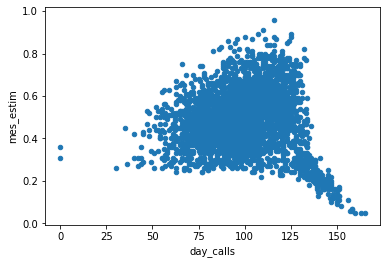

In [72]:
churn.plot.scatter(x='day_calls', y='mes_estim')

In [73]:
churn[['day_calls','mes_estim']].corr(method='spearman')

,day_calls,mes_estim
day_calls,1.00000,0.04335
mes_estim,0.04335,1.00000


In [82]:
df_12 = churn.loc[churn.treatment != 0, ['treatment', 'churn']]
df_02 = churn.loc[churn.treatment != 1, ['treatment', 'churn']]
df_01 = churn.loc[churn.treatment != 2, ['treatment', 'churn']]

print(sc.stats.chi2_contingency(pd.crosstab(df_01.treatment, df_01.churn), correction=True)[1])
print(sc.stats.chi2_contingency(pd.crosstab(df_02.treatment, df_02.churn), correction=True)[1])
print(sc.stats.chi2_contingency(pd.crosstab(df_12.treatment, df_12.churn), correction=True)[1])

0.2517524983193889
0.17528809842137202
0.011135281386020091


In [86]:
pd.crosstab(df_12.treatment, df_12.churn)

churn,False.,True.
treatment,,
1,917,180
2,965,138
